In [4]:
import pandas as pd

In [5]:
df = pd.read_csv("/Users/ARPAN/Downloads/1. Dataset Download/Iris.csv")

In [6]:
from plotly import express as ex

ex.scatter_3d(df,x=df['PetalLengthCm'],
              y=df['PetalWidthCm'],
              z=df['SepalLengthCm'],
              size=df['SepalWidthCm'],
              color=df['Species'])

In [7]:
df.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
1,2,4.9,3.0,1.4,0.2,Iris-setosa
145,146,6.7,3.0,5.2,2.3,Iris-virginica
18,19,5.7,3.8,1.7,0.3,Iris-setosa
124,125,6.7,3.3,5.7,2.1,Iris-virginica
38,39,4.4,3.0,1.3,0.2,Iris-setosa
22,23,4.6,3.6,1.0,0.2,Iris-setosa
109,110,7.2,3.6,6.1,2.5,Iris-virginica
0,1,5.1,3.5,1.4,0.2,Iris-setosa
40,41,5.0,3.5,1.3,0.3,Iris-setosa
66,67,5.6,3.0,4.5,1.5,Iris-versicolor


In [8]:
X = df.drop('Id',axis=1).iloc[:,:4]
y = df['Species']

In [9]:
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y = train_test_split(X,y,test_size=0.2,stratify=y)

In [10]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=200,verbose=0,solver='newton-cg')

model = lr.fit(train_x,train_y)

In [11]:
y_pred = model.predict(test_x)

In [12]:
from sklearn import metrics

print("The accuracy of the model is: ",metrics.accuracy_score(test_y,y_pred)*100)
print("The recall of the model is: ",metrics.recall_score(test_y,y_pred,average='weighted')*100)
print("The precision of the model is: ",metrics.precision_score(test_y,y_pred,average='weighted')*100)
print('\t\tClassification Report:\n', metrics.classification_report(test_y, y_pred,target_names=["Setosa", "Virginica", "Versicolor"]))

The accuracy of the model is:  93.33333333333333
The recall of the model is:  93.33333333333333
The precision of the model is:  94.44444444444446
		Classification Report:
               precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
   Virginica       1.00      0.80      0.89        10
  Versicolor       0.83      1.00      0.91        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



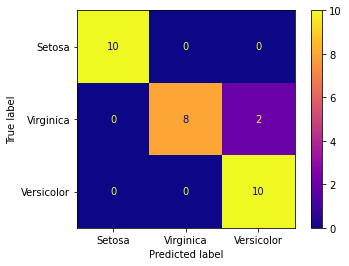

In [13]:
cm = metrics.confusion_matrix(test_y,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Setosa", "Virginica", "Versicolor"])
cm_display.plot(cmap='plasma')

In [14]:
y_pred_prob = model.predict_proba(test_x)
y_pred_log = model.predict_log_proba(test_x)

Text(0, 0.5, 'Log probablities')

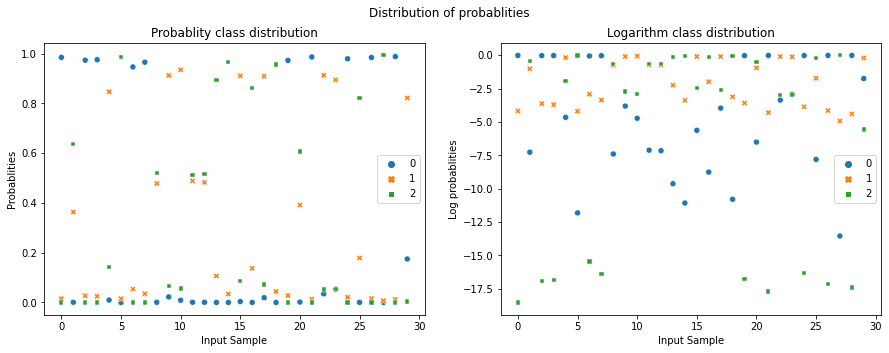

In [15]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.subplots(figsize=(15,5))
plt.suptitle("Distribution of probablities")

plt.subplot(1,2,1)
sns.scatterplot(y_pred_prob)
plt.title('Probablity class distribution')
plt.xlabel('Input Sample')
plt.ylabel('Probablities')

plt.subplot(1,2,2)
sns.scatterplot(y_pred_log)
plt.title('Logarithm class distribution')
plt.xlabel('Input Sample')
plt.ylabel('Log probablities')